In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data= pd.read_excel("/content/drive/MyDrive/CSE440/oasis_longitudinal_demographics.xlsx")

In [4]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [5]:
data = data.loc[data['Visit']==1] 
data = data.reset_index(drop=True) 
data['M/F'] = data['M/F'].replace(['F','M'], [0,1]) 
data['Group'] = data['Group'].replace(['Converted'], ['Demented'])
data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0]) 

In [6]:
data = data.drop(['MRI ID', 'Visit', 'Hand'], axis=1) 

**Bar Drawing**

In [7]:
def bar_chart(feature):
    Demented = data[data['Group']==1][feature].value_counts()
    Nondemented = data[data['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(10,6))

**Gender and Group**
Female=0,Male=1

Text(0.5, 1.0, 'Gender and Demented rate')

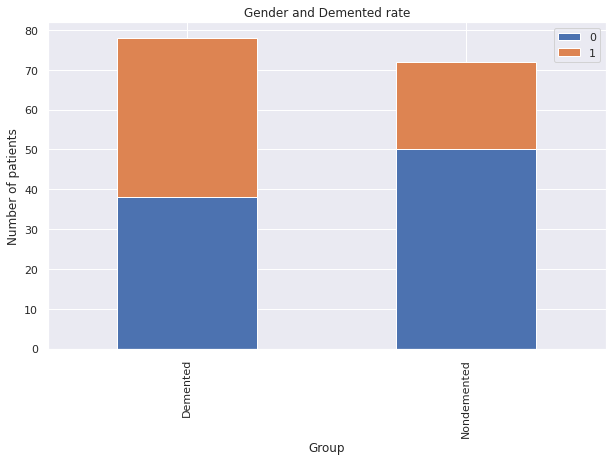

In [26]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

**MMSE(Mini Mental State Examination) Score higher than demented group**Non Demented=0
Demented=1 

(15.0, 30.0)

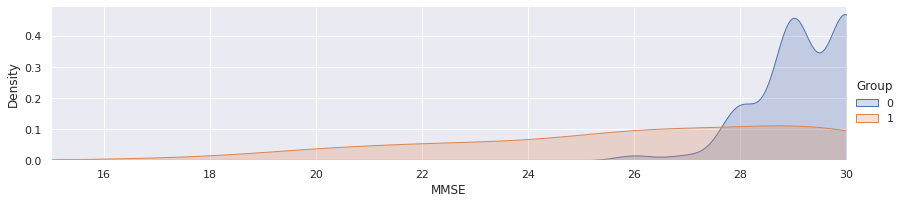

In [13]:
facet= sns.FacetGrid(data,hue="Group", aspect=4)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, data['MMSE'].max()))
facet.add_legend()
plt.xlim(15)

**ASF(Atlas Scaling Factor)**Non Demented=0
Demented=1 

(0.5, 2.0)

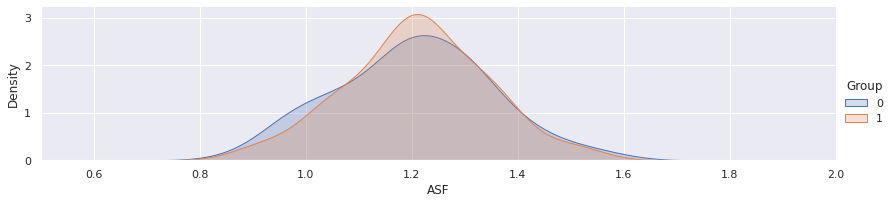

In [15]:
facet= sns.FacetGrid(data,hue="Group", aspect=4)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, data['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

**eTIV(Estimated Total Intracranial Volume)**Non Demented=0
Demented=1 

(800.0, 2200.0)

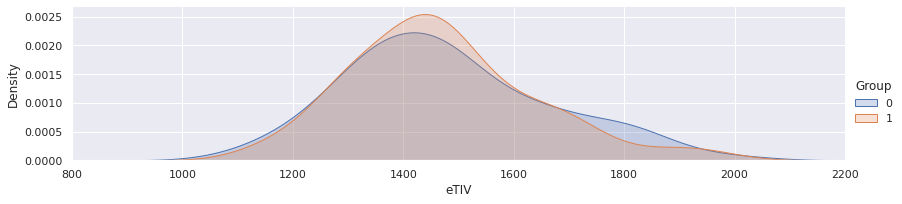

In [17]:
facet= sns.FacetGrid(data,hue="Group", aspect=4)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, data['eTIV'].max()))
facet.add_legend()
plt.xlim(800, 2200)


**nWBV(Normalized Whole Brain Volume)**Non Demented=0
Demented=1 

(0.6, 0.9)

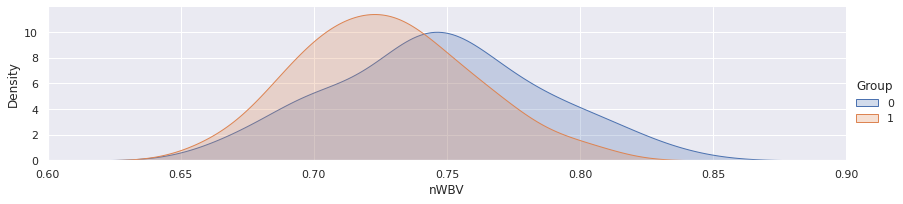

In [20]:
facet= sns.FacetGrid(data,hue="Group", aspect=4)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, data['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

**AGE**
Non Demented=0
Demented=1 

(40.0, 110.0)

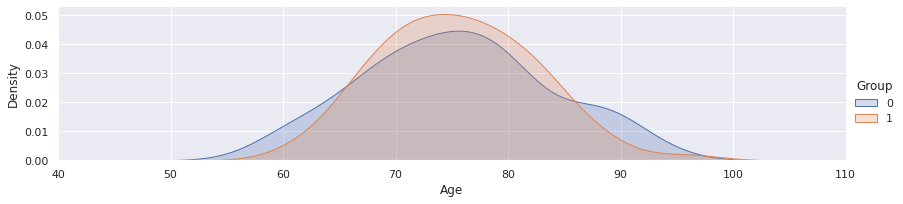

In [27]:
facet= sns.FacetGrid(data,hue="Group", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlim(40,110)

**EDUC(Years of Education)**
Non Demented=0
Demented=1 

(0.0, 0.2)

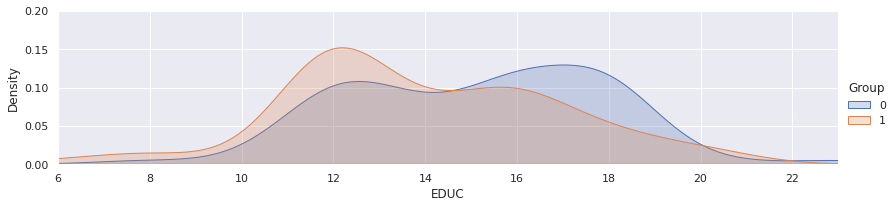

In [24]:
facet= sns.FacetGrid(data,hue="Group", aspect=4)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(data['EDUC'].min(), data['EDUC'].max()))
facet.add_legend()
plt.ylim(0,0.2)